# Analyze  COVID-19

Let's analyze the time series on COVID-19 virus contamination around the world.

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as plt
import plotly.graph_objects as go

Now, let's import the data. It's important to specify in the pd.read_csv command which columns will be parsed as dates. Pandas has robust methods for working with this type of information.

In [101]:
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


Now, let's check the variable types to ensure that the columns were correctly imported.

In [102]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Column names should not have uppercase letters or special characters. Let's use a function to correct the column names.

In [103]:
import re
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [104]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [105]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


## Analyses  

Great! Now let's start investigating the variables we have available. We know that these are time series divided by state. Therefore, to conduct any analysis, we need to segment our data at this "granularity."  

First, let's check how many states we have data for in the US.

In [106]:
df.loc[df.countryregion == 'US']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26703,26704,2020-05-19,Virginia,US,2020-05-20 02:32:19,32145.0,1042.0,0.0
26704,26705,2020-05-19,Washington,US,2020-05-20 02:32:19,18811.0,1031.0,0.0
26705,26706,2020-05-19,West Virginia,US,2020-05-20 02:32:19,1502.0,68.0,0.0
26707,26708,2020-05-19,Wisconsin,US,2020-05-20 02:32:19,12885.0,467.0,0.0


## Confirmed Cases

In [107]:
us = df.loc[(df["countryregion"] == "US") & (df["confirmed"] > 0) & (df["provincestate"] == "New York")]


In [108]:
plt.line?

Signature:
plt.line(
    data_frame=None,
    x=None,
    y=None,
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    symbol_map=None,
    markers=False,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    line_shape=None,
    render_mode='auto',
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a 2D line plot, each row of `data_frame` 

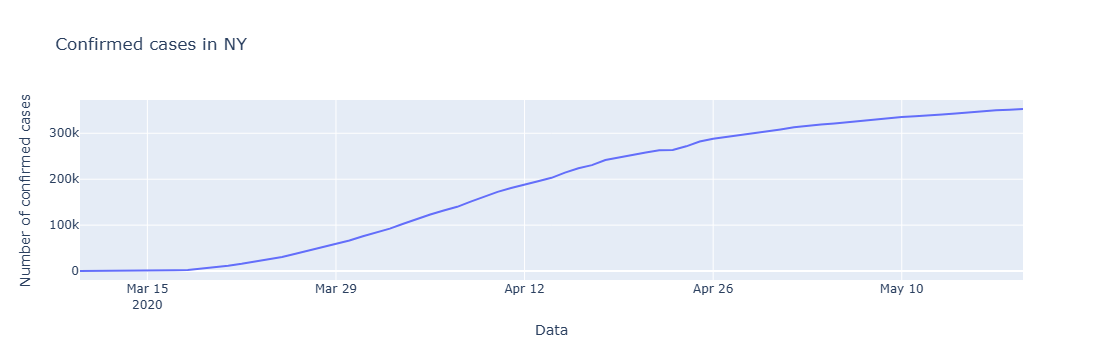

In [109]:
plt.line(us, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Number of confirmed cases'},
       title='Confirmed cases in NY')

## Number of new cases per day

In [110]:
#  Let's implement a function to count new cases

us = us.copy()  

us['newcases'] = list(map(
    lambda x: 0 if (x==0) else us['confirmed'].iloc[x] - us['confirmed'].iloc[x-1],
    np.arange(us.shape[0])
))

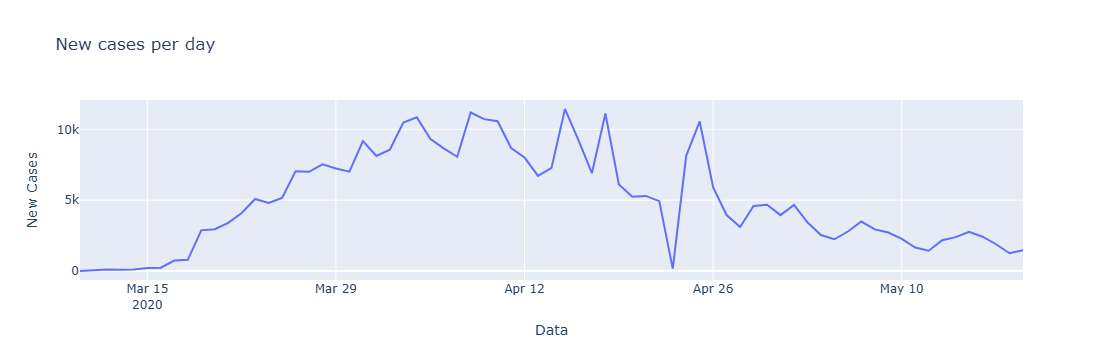

In [111]:
# Visualizing
plt.line(us, x='observationdate', y='newcases', title='New cases per day',
       labels={'observationdate': 'Data', 'newcases': 'New Cases'})

The number of new cases seems like an excellent candidate for modeling. I wonder if we can predict when the number of new cases will start to decline?

## Deaths

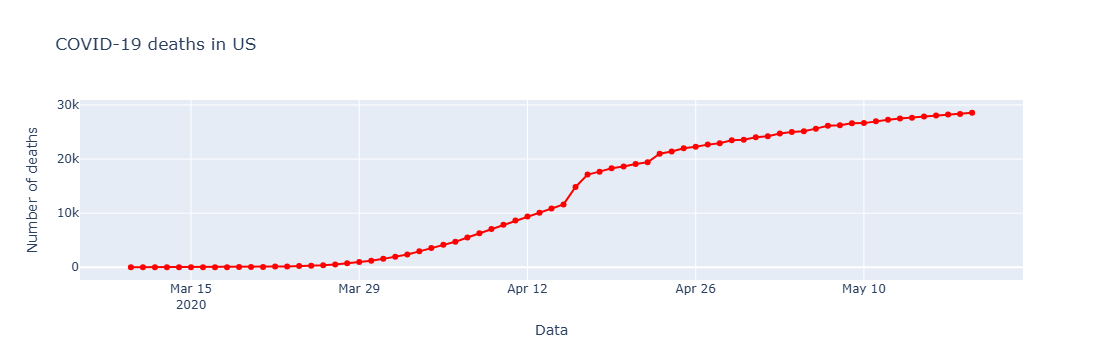

In [112]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=us.observationdate, y=us.deaths, name='Deaths', mode='lines+markers',
              line=dict(color='red'))
)
#Edit o layout
fig.update_layout(title='COVID-19 deaths in US',
                   xaxis_title='Data',
                   yaxis_title='Number of deaths')
fig.show()

## Growth rate  
Let's calculate the growth rate of COVID-19 since the first case.

In [116]:
def growth_rate(data, variable, data_start = None, data_end = None):
    # If `data_inicio` is None, set it as the first available date in the dataset.
    if data_start == None:
        data_start = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_start = pd.to_datetime(data_start)
        
    if data_end == None:
        data_end= data.observationdate.iloc[-1]
    else:
        data_end = pd.to_datetime(data_end)
    
    # Define the values for present and past.
    past = data.loc[data.observationdate == data_start, variable].values[0]
    present = data.loc[data.observationdate == data_end, variable].values[0]
    
    # Define the number of time points we will evaluate.
    n = (data_end - data_start).days
    
    # Calculate the rate
    rate = (present/past)**(1/n) - 1

    return rate * 100

In [117]:
average_growth = growth_rate(us, 'confirmed')
print(f"The average growth of COVID-19 in us during the evaluated period was {average_growth.round(2)}%.")

The average growth of COVID-19 in us during the evaluated period was 11.5%.


Now, let's observe the behavior of the **growth rate over time**. To do this, we will define a function to calculate the daily growth rate.

In [118]:
def growth_rate_daily(data, variable, data_start = None):
    if data_start == None:
        data_start = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_start = pd.to_datetime(data_start)
        
    data_end = data.observationdate.max()
    n = (data_end - data_start).days
    rate = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(rate)*100

In [119]:
rate_daily = growth_rate_daily(us, 'confirmed')

In [120]:
rate_daily

array([2.71676301e+01, 4.90909091e+01, 2.83536585e+01, 2.47030879e+01,
       3.94285714e+01, 3.21038251e+01, 7.64219235e+01, 4.62485346e+01,
       1.15030060e+02, 5.48928239e+01, 4.09145608e+01, 3.49274125e+01,
       3.21772152e+01, 2.29697376e+01, 2.00926755e+01, 2.28137868e+01,
       1.84782322e+01, 1.67884838e+01, 1.38103415e+01, 1.17606626e+01,
       1.37557566e+01, 1.07011459e+01, 1.01944061e+01, 1.13300759e+01,
       1.05314263e+01, 8.19358183e+00, 7.02744398e+00, 6.11463035e+00,
       7.99714030e+00, 7.09514699e+00, 6.53298636e+00, 5.03516142e+00,
       4.42312154e+00, 3.55281882e+00, 3.71445065e+00, 5.63195744e+00,
       4.30721740e+00, 3.08729453e+00, 4.82009740e+00, 2.52490567e+00,
       2.11649819e+00, 2.09476014e+00, 1.90856979e+00, 6.38074837e-02,
       3.08585744e+00, 3.88563644e+00, 2.09184704e+00, 1.37166068e+00,
       1.06508308e+00, 1.55367902e+00, 1.56194213e+00, 1.29512570e+00,
       1.51241916e+00, 1.09848328e+00, 8.02111151e-01, 7.01984305e-01,
      

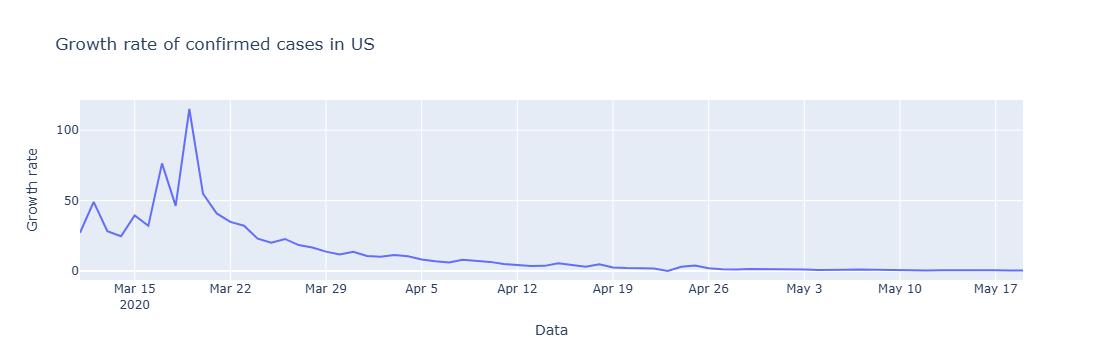

In [121]:
first_day = us.observationdate.loc[us.confirmed > 0].min()
plt.line(x=pd.date_range(first_day, us.observationdate.max())[1:],
        y=rate_daily, title='Growth rate of confirmed cases in US',
       labels={'y':'Growth rate', 'x':'Data'})

# Predictions  

Let's build a time series model to forecast new cases. Before that, let's analyze the time series.

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

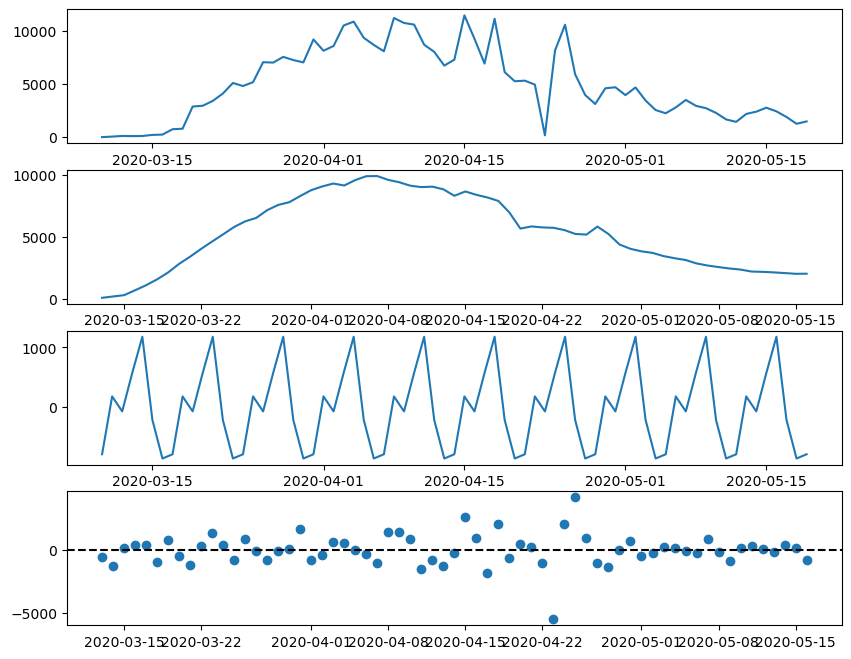

In [123]:
newcases = us.newcases
newcases.index = us.observationdate

res = seasonal_decompose(newcases)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(newcases.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

## Decomposing the confirmed cases time series

In [124]:
confirmed = us.confirmed
confirmed.index = us.observationdate

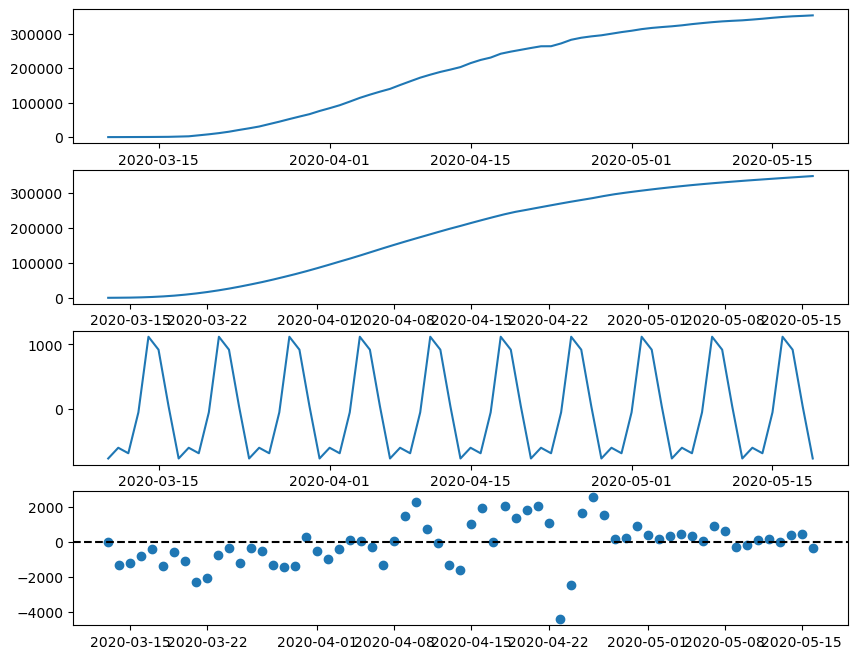

In [125]:
res2 = seasonal_decompose(confirmed)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed)
ax2.plot(res2.trend)
ax3.plot(res2.seasonal)
ax4.scatter(confirmed.index, res2.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# Predicting the number of confirmed cases with AUTO-ARIMA

Auto-ARIMA is an automated method used to identify the best-fitting ARIMA (AutoRegressive Integrated Moving Average) model for time series data. It automatically selects the optimal parameters for the AR, I, and MA components, saving time and reducing manual effort.

What does Auto-ARIMA do?
Automatic model selection: It tests various combinations of AR, I, and MA parameters.
Stationarity detection: Identifies if the data is stationary and applies transformations if needed.
Seasonality handling: Recognizes seasonal patterns and adjusts the model accordingly.
Model optimization: Uses criteria like AIC/BIC to choose the best model.


In [126]:
!pip install pmdarima

In [127]:
from pmdarima.arima import auto_arima

In [130]:
model = auto_arima(confirmed)

In [131]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

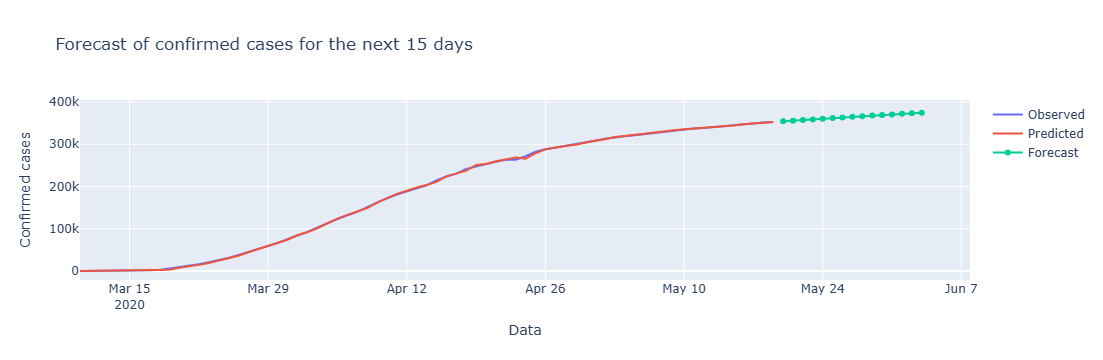

In [132]:
fig = go.Figure(go.Scatter(
    x=confirmed.index, y=confirmed, name='Observed'
))

fig.add_trace(go.Scatter(x=confirmed.index, y = model.predict_in_sample(), name='Predicted'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-05'), y=model.predict(15), name='Forecast'))

fig.update_layout(title='Forecast of confirmed cases for the next 15 days',
                 yaxis_title='Confirmed cases', xaxis_title='Data')
fig.show()

# Forecasting with Facebook Prophet

In [ ]:
!conda install -c conda-forge fbprophet -y

In [ ]:
from fbprophet import Prophet

In [ ]:
# Preparing the data confirmed
train = confirmed.reset_index()[:-5]
test = confirmed.reset_index()[-5:]

# Rename columns
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

Prophet = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 1000000
pop = 8258035 #https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/PST045223
train['cap'] = pop

# Train the model
Prophet.fit(train)

# Building forecasts for the future
future_dates = Prophet.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  Prophet.predict(future_dates)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Prediction'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observed - Test'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observed - Train'))
fig.update_layout(title='Predictions of confirmed cases in US / NY')
fig.show()

END......... Congratulations!!!